# سوال دوم

الگوریتمی توسعه دهید بوسیله آن بتوان قطعه تصویری را در تصویر دیگر جستجو نمود. برای این موضوع الزم است هیستوگرام را 
برای قطعه تصویر محاسبه نماید. سپس پنجره ای را در تصویر هدف انتقال داده و در هر انتقال قطعه ای از تصویر را جدا و هیستوگرام 
آن را محاسبه نماید. هیستوگرام قطعه تصویر را با قطعه جستجو شده مقایسه نماید. سپس قطعه ای از تصویر را انتخاب نماید که 
بیشترین شباهت را به هیستوگرام قطعه جستجو شده را داشته باشد

در این سوال در عکس مسی بدنبال تصویر توپ میگردیم.
در بخش زیر این دو تصویر را خوانده و نمایش میدهیم

In [1]:
import numpy
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

تصویر توپ در بخش زیر مشخص است 

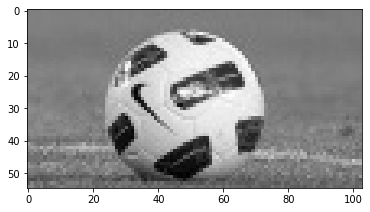

In [2]:
ballImage = cv2.imread("../ball.jpg" , cv2.IMREAD_GRAYSCALE)

plt.imshow(ballImage , cmap="gray")

در بخش زیر تصویر مسی مشخص است.

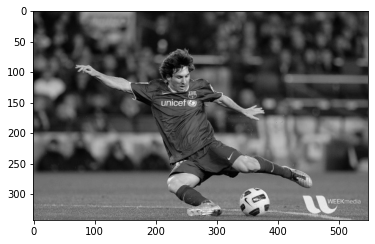

In [3]:
messiImage = cv2.imread("../messi5.jpg" , cv2.IMREAD_GRAYSCALE)

plt.imshow(messiImage , cmap="gray")

برای محاسبه و چک کردن اینکه ایا دو هیستوگرام باهم برابرند یا نه، تابع زیر تعریف شده است
طرز کار این تابع به این شکل است که مجموع اخلتلاف های دو هیستوگرام را محاسبه میکند که درواقع میشود مساحت سطح اخلاف دو نمودار هیستوگرام
سپس در هر نقطه ماکسیمم گیری میکند و مقادیر حاصله را باهم جمع میکند، با این کار درواقع مساحت کل زیر سطح نمودار ها را محاسبه کرده است.
در مرحله اخر نسبت مساحت اختلاف دو نمودار به مساحت کل زیر نمودار ها را بازمیگرداند. و این مقدار بازگرداننده شده در تابع بالاتر از آن استفاده میشود.

In [8]:
def isEqual(firstHistogram , secondHistogram):
#     calculating difference 
    differenceArray = numpy.absolute(numpy.array(firstHistogram) - numpy.array(secondHistogram))
    difference = numpy.sum(differenceArray)
    
#     calculating maximums
    maximums = numpy.maximum(firstHistogram , secondHistogram)
    
#     calculating maximums sum
    maximumSum = maximums.sum()
    
    return (difference / maximumSum)
    

در بخش زیر تابعی برای پیدا کردن یک عکس داخل عکسی دیگر ارایه داده شده است.

In [9]:
def FindImageIn(mainImage , searchImage):
    
#   calculating search image width and height
    searchImageWidth = len(searchImage[0])
    searchImageHeight = len(searchImage)
    
#   calculating main image width and height
    mainImageWidth = len(mainImage[0])
    mainImageHeight = len(mainImage)
    
#   variable for finding minimum Difference Histogram
    minimumDifferenceHistogram = math.inf
    minimumDifferenceHistogramX = -1
    minumumDifferenceHistogramY = -1
    
#   calculating search image histogram
    searchImageHistogram = cv2.calcHist([searchImage], [0], None, [256], [0, 256])
    
    for y in range (mainImageHeight - searchImageHeight):
        for x in range (mainImageWidth - searchImageWidth):
            
#           calculating window box
            searchWindow = mainImage[y : y + searchImageHeight , x : x + searchImageWidth]
    
#           calculate window box histogram
            searchWindowHistogram = cv2.calcHist([searchWindow], [0], None, [256], [0, 256])
    
#           check if the window histogram is equal to search image histogram
            comparsion = isEqual(searchImageHistogram , searchWindowHistogram)
            
            if(comparsion < minimumDifferenceHistogram):
                minimumDifferenceHistogram = comparsion
                minimumDifferenceHistogramX = x
                minumumDifferenceHistogramY = y
                
                if(comparsion == 0):
                    return [minimumDifferenceHistogramX , minumumDifferenceHistogramY]
            
    return [minimumDifferenceHistogramX , minumumDifferenceHistogramY]

طرز کار متد بالا به این صورت است که اندازه تصویر اصلی و تصویری که قرار است جستجو شود را محاسبه میکند. پس از آن مقدار هیستوگرام تصویری که قرار است جستجو شود محاسبه میشود. 
بعد از وارد حلقه میشود و با استفاده از شروط داخل حلقه، از این که پنجره مورد نظر ما از تصویر بیرون بزند جلوگیری میشود
سپس پنجره مورد نظر را بدست می اورد بعد هیستوگرام آن را محاسبه میکند، که اگر تابع isEqual مقدار comparison که برمیگرداند کمتر از مقدار ابتدایی minumumDifferenceHistogram باشد. مقدار آن را به جای مقدار کوچیکترین اختلاف ذخیره میکند و مقدار x و y را در متغیر های مربوطه ذخیره میکند تا درنهایت در خروجی تابع این مقادیر را برگرداند. و اگر چنین مقداری پیدا نشد مقدار [1- , 1-] را از خروجی برمیگرداند.

حال در بخش زیر به جستجوی تصویر توپ در تصویر مسی میپردازیم

In [10]:
result = FindImageIn(messiImage , ballImage)

در بخش بعدی نیز قسمتی از تصویر، که به عنوان تصویر مورد نظر توسط الگوریتم بالا پیدا شده است مشخص میگردد

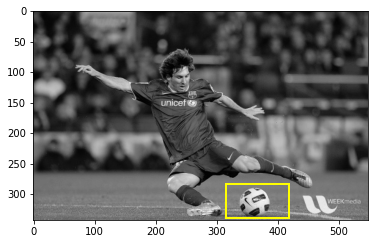

In [11]:
if(result[0] == -1):
    print("nothing found")
else:
    h = len(ballImage)
    w = len(ballImage[0])
    stpoint = (result[0], result[1])

    fig, ax = plt.subplots()
    ax.imshow(messiImage , cmap="gray")
    ax.add_patch(patches.Rectangle(stpoint, w, h,fc='none',linewidth = 2, linestyle="solid",color="yellow"))
    plt.show()